Take up a pretrained model and use for our classification 
why?
able to achive in lesser no of epochs
change few layers and get high accuracy
Apply knowledge gained in learning to recognise creatures to classify flowers

using mobilenet from tensorflow hub
 for the same 

In [ ]:
#freeze all layers except last one meaning model weight does'nt change
#softmax to classify 5 classes
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [ ]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
#adding 3 dimesion now (224,224,3)


In [ ]:
#classfier

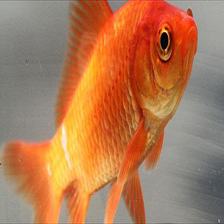

In [ ]:
#downloading a goldfish image
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
#adding one more axis as usually more than 1 image can come for prediction
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])


1/1 [==============================] - 2s 2s/step


In [ ]:
result.shape

(1, 1001)

In [ ]:
predicted_label = np.argmax(result)

In [ ]:
image_labels=[]
with open("/content/ImageNetLabels.txt","r") as file:
  image_labels=file.read().splitlines()
image_labels[predicted_label]


'goldfish'

now, using this model for flower classification

In [ ]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dir = tf.keras.utils.get_file('flower_photos',origin = dataset,cache_dir='.',untar=True)

In [ ]:
#dir

In [ ]:
#converting the path strings to path locations to obtain image by its location
import pathlib
dir = pathlib.Path(dir)
list(dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/19506262462_d0945c14a6.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4575406391_7a62c5f90f_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2326334426_2dc74fceb1.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19600096066_67dc941042.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3584414925_1e6c4b61db_n.jpg')]

In [ ]:
roses = list(dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2273917656_6d6c038283.jpg'),
 PosixPath('datasets/flower_photos/roses/7455236056_b6d71a8dab.jpg')]

In [ ]:
Image.open(roses[3])
image_count = len(list(dir.glob('*/*.jpg')))
print(image_count)

3670


making dictionary 


In [ ]:
flowers ={
    'roses':list(dir.glob('roses/*')),
    'daisy':list(dir.glob('daisy/*')),
    'dandelion':list(dir.glob('dandelion/*')),
    'sunflowers':list(dir.glob('sunflowers/*')),
    'tulips':list(dir.glob('tulips/*'))
}

In [ ]:
#flowers['roses']

In [ ]:
#create labelled directory as we cant use text in ML
"""flowers_label ={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}"""

"flowers_label ={\n    'roses':0,\n    'daisy':1,\n    'dandelion':2,\n    'sunflowers':3,\n    'tulips':4,\n}"

In [ ]:
img = cv2.imread(str(flowers['roses'][0]))
img.shape
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

creating x, y


In [ ]:
print(flowers.keys())

dict_keys(['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'])


In [ ]:
x, y = [], []

for flower_name, images in flowers.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flower_name)


In [ ]:
print(y[0])


roses


In [ ]:
x=np.array(x)
y=np.array(y)


In [ ]:
"""for i in range(len(y)):
  y[i]=flowers_label[y[i]]
print(y)"""

NameError: ignored

train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [ ]:
print(x_train.shape," ",y_train.shape)

(2752, 224, 224, 3)   (2752,)


In [ ]:
x_train_scaled= x_train/ 255
x_test_scaled= x_test/255

In [ ]:
x[0]

array([[[ 19,  74, 118],
        [ 19,  76, 120],
        [ 20,  79, 123],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 19,  73, 116],
        [ 19,  76, 119],
        [ 20,  80, 122],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 18,  74, 115],
        [ 19,  77, 117],
        [ 19,  80, 120],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[120, 151, 182],
        [121, 152, 183],
        [122, 153, 184],
        ...,
        [122, 156, 203],
        [122, 157, 202],
        [122, 157, 202]],

       [[123, 154, 185],
        [125, 155, 187],
        [125, 156, 187],
        ...,
        [127, 161, 206],
        [127, 162, 206],
        [127, 162, 206]],

       [[126, 157, 188],
        [127, 158, 189],
        [127, 158, 189],
        ...,
        [130, 165, 209],
        [130, 165, 209],
        [130, 165, 209]]

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

take pre_trained model to try on flower_images

In [ ]:
feature_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model= hub.KerasLayer(
    feature_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
total=5
model = keras.models.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(total)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


In [ ]:
print(y_train)

['dandelion' 'roses' 'daisy' ... 'dandelion' 'sunflowers' 'sunflowers']


In [ ]:
#y_train_encoded = np.array(y_train).reshape(-1, 1)
#y_train_encoded = tf.keras.utils.to_categorical(y_train_encoded, num_classes=total)


In [ ]:
print(x_train.shape)

(2752, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Pass the encoded labels to model.fit()
model.fit(x_train_scaled, y_train_encoded, batch_size=128, epochs=5, validation_steps=1)


Epoch 1/5
22/22 [==============================] - 123s 5s/step - loss: 1.3349 - acc: 0.4771
Epoch 2/5
22/22 [==============================] - 110s 5s/step - loss: 0.6546 - acc: 0.7740
Epoch 3/5
22/22 [==============================] - 112s 5s/step - loss: 0.4937 - acc: 0.8347
Epoch 4/5
22/22 [==============================] - 110s 5s/step - loss: 0.4199 - acc: 0.8648
Epoch 5/5
22/22 [==============================] - 115s 5s/step - loss: 0.3720 - acc: 0.8844


In [ ]:
#model.fit(x_train_scaled,y_train_encoded,batch_size=128,epochs=5,validation_steps=1)

In [ ]:
y_test_encoded = label_encoder.fit_transform(y_test)
model.evaluate(x_test_scaled,y_test_encoded)

29/29 [==============================] - 32s 1s/step - loss: 0.4067 - acc: 0.8617


[0.406749963760376, 0.8616557717323303]